In [1]:
#compute gradient density information weights over images and save matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from numpy.fft import fft
import glob
import time

In [2]:
#image folder setup
pathImage='../scout_video_09/'
filePrefix='gimbal0_'
fileSuffix='.jpg'
idxStart=2000 
idxEnd=2500

In [3]:
#Try information weighting. Load DFD result and compute information weight.
start = time.time()

tileSpan=15
dimX=1920
dimY=1080
searchRange=10
searchStep=1

noImages=2
idxStart=2000

idxFile=0
filename=filePrefix + str(idxFile + idxStart) + fileSuffix
img_ref = mpimg.imread(pathImage + filename) / 256

m=0
print(pathImage + filePrefix +"DFD_" + str(m + idxStart) + ".npy")
#DFD=np.load(pathImage + filePrefix +"DFD_" + str(m + idxStart) + ".npy")
DFDx=np.load(pathImage + filePrefix +"DFDx_" + str(m + idxStart) + ".npy")
DFDy=np.load(pathImage + filePrefix +"DFDy_" + str(m + idxStart) + ".npy")

DFDEc=np.zeros((dimY-2*searchRange-2*tileSpan, dimX-2*searchRange-2*tileSpan))
(dimDFDy,dimDFDx)=DFDEc.shape
print("DFD shape: ", DFDEc.shape)

img_ref_grad_a = img_ref[1:dimY,   0:dimX-1, :] - img_ref[0:dimY-1, 0:dimX-1, :]
img_ref_grad_b = img_ref[0:dimY-1, 1:dimX,   :] - img_ref[0:dimY-1, 0:dimX-1, :]
img_ref_grad_c = img_ref[1:dimY,   1:dimX,   :] - img_ref[0:dimY-1, 0:dimX-1, :]
img_ref_grad=img_ref_grad_a**2 + img_ref_grad_b**2 + img_ref_grad_c**2/np.sqrt(2)

for x in range(dimDFDx):
    for y in range(dimDFDy):
        iX0=searchRange+x
        iX1=searchRange+tileSpan*2+1+x
        iY0=searchRange+y
        iY1=searchRange+tileSpan*2+1+y
        
        tTile=img_ref_grad[iY0:iY1, iX0:iX1, :]
        #print(tTile.shape)
        (cY, cX, cZ)=tTile.shape
        DFDEc[y,x]=(tTile > 0).sum() / (cY*cX*cZ)

end = time.time()
print(end - start)

../scout_video_09/gimbal0_DFD_2000.npy
DFD shape:  (1030, 1870)
9.848244190216064


31 31 3


<function matplotlib.pyplot.show(close=None, block=None)>

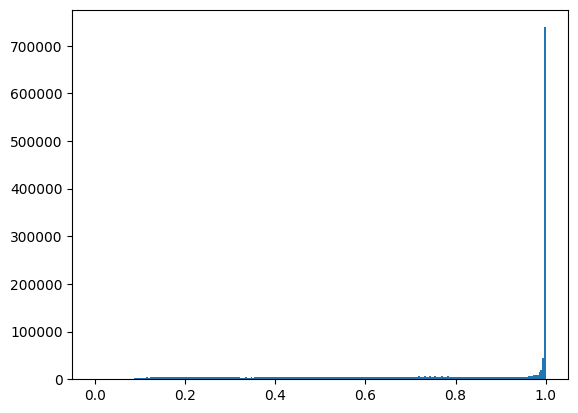

In [10]:
print(cY,cX,cZ)
plt.hist(DFDEc.flatten(),255)
plt.show

DFD shape:  (1030, 1870)


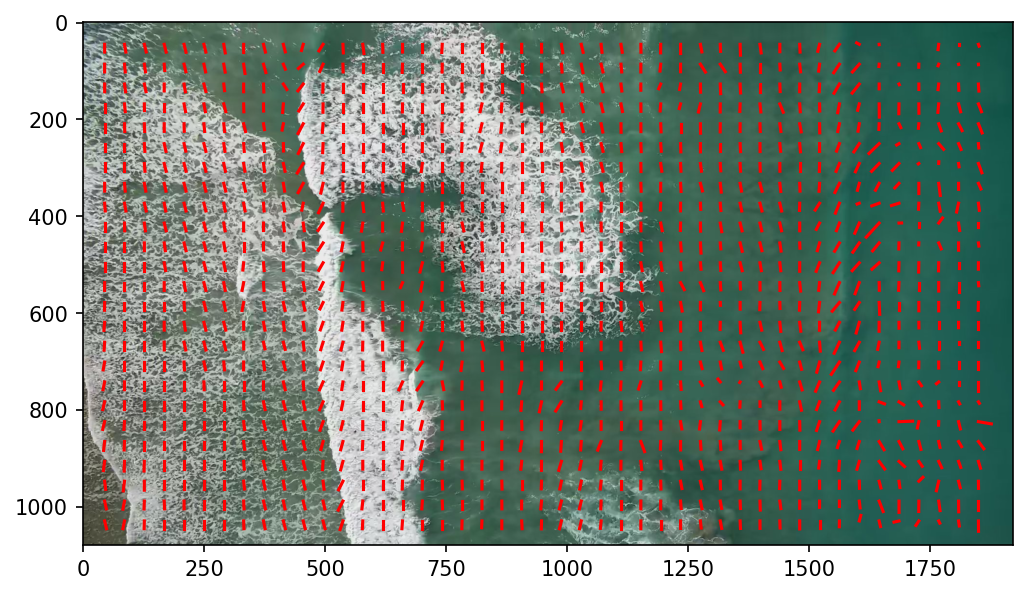

In [18]:
#plot DFD flow vector
windowSpanX=20
windowSpanY=20

f=plt.figure(dpi=150)
f.set_figwidth(8)
f.set_figheight(12)

print("DFD shape: ", DFDx.shape)
(DFDheight,DFDwidth)=DFDx.shape

imgplot_1 = plt.imshow(img_ref)
for x in range(windowSpanX, DFDwidth-windowSpanX, 2*windowSpanX+1 ):
    for y in range(windowSpanY, DFDheight-windowSpanY, 2*windowSpanY+1 ):
        vX=np.mean(DFDx[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
        vY=np.mean(DFDy[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
        vX0=x + searchRange + tileSpan
        vY0=y + searchRange + tileSpan
        #print(vX0, vX0+vX , vY0, vY0+vY)
        plt.plot([vX0, vX0+4*vX], [vY0, vY0+4*vY], 'r')

Compesantion vector Y:  5.0
DFD shape:  (1030, 1870)


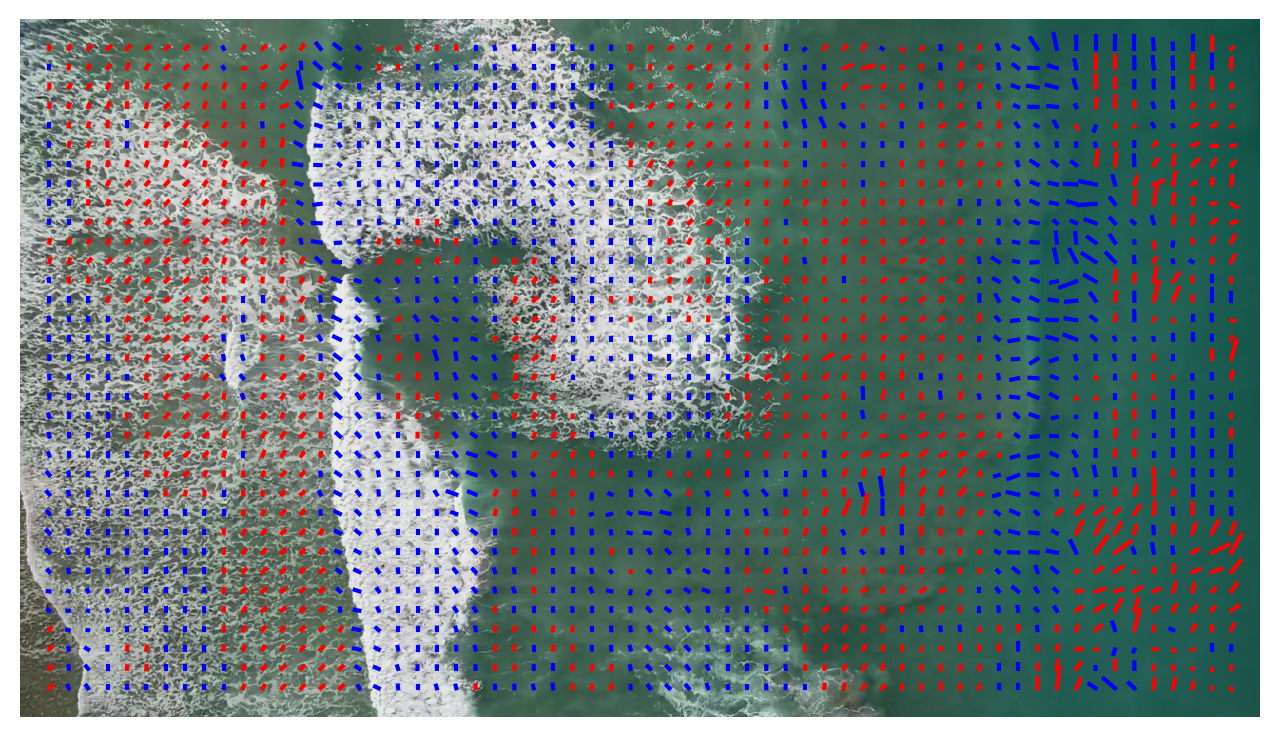

In [19]:
#plot flow vector with drone speed compensation
windowSpanX=20
windowSpanY=20
windowShiftX=30
windowShiftY=30
#compensation parameters
speedY=5 #m/s
frameRate=10 #Hz
pixelSize=0.1 #m
compensateY= speedY / frameRate / pixelSize
print("Compesantion vector Y: ", compensateY)

f=plt.figure(dpi=200)
f.set_figwidth(8)
f.set_figheight(12)

print("DFD shape: ", DFDx.shape)
(DFDheight,DFDwidth)=DFDx.shape
imgplot_1 = plt.imshow(img_ref)
for x in range(windowSpanY, DFDwidth-windowSpanX+1, windowShiftX ):
    for y in range(windowSpanY, DFDheight-windowSpanY+1, windowShiftY):
        vX=np.mean(DFDx[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
        vY=np.mean(DFDy[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
        vX0=x + searchRange + tileSpan
        vY0=y + searchRange + tileSpan
        #print(vX0, vX0+vX , vY0, vY0+vY)
        if vX>0:
            lineColor='r'
        else:
            lineColor='b'    
        plt.plot([vX0, vX0+4*vX], [vY0, vY0+4*(vY-compensateY)], lineColor)
plt.axis('off')
plt.savefig('DFD1_test.png',bbox_inches='tight', pad_inches = 0)

Compesantion vector Y:  5.0
DFD shape:  (1030, 1870)


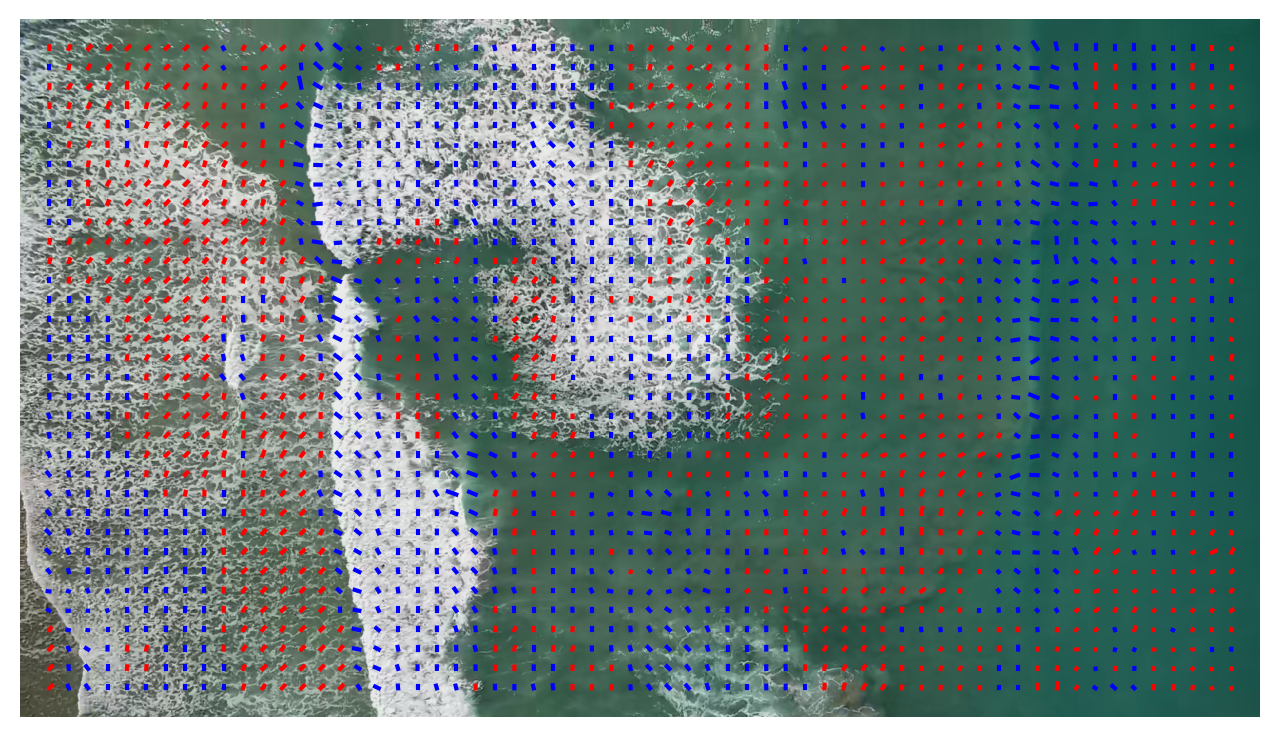

In [20]:
#plot flow vector drone speed compensation and information weighting
windowSpanX=20
windowSpanY=20
windowShiftX=30
windowShiftY=30
#compensation parameters
speedY=5 #m/s
frameRate=10 #Hz
pixelSize=0.1 #m
compensateY= speedY / frameRate / pixelSize
print("Compesantion vector Y: ", compensateY)


f=plt.figure(dpi=200)
f.set_figwidth(8)
f.set_figheight(12)

print("DFD shape: ", DFDx.shape)
(DFDheight,DFDwidth)=DFDx.shape
imgplot_1 = plt.imshow(img_ref)
for x in range(windowSpanY, DFDwidth-windowSpanX+1, windowShiftX ):
    for y in range(windowSpanY, DFDheight-windowSpanY+1, windowShiftY):
        vX=np.mean(DFDx[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
        vY=np.mean(DFDy[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
        vC=np.mean(DFDEc[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
        vX0=x + searchRange + tileSpan
        vY0=y + searchRange + tileSpan
        #print(vX0, vX0+vX , vY0, vY0+vY)
        if vX>0:
            lineColor='r'
        else:
            lineColor='b'    
        plt.plot([vX0, vX0+4*vX*vC], [vY0, vY0+4*(vY-compensateY)*vC], lineColor)
plt.axis('off')
plt.savefig('DFD1_test.png',bbox_inches='tight', pad_inches = 0)

In [4]:
#perform DFD and gardient density information weight analysis over images and save them
start = time.time()
imagePrefix='DFD1_gimbal0_'
imageSuffix='.png'

tileSpan=15
dimX=1920
dimY=1080
searchRange=10
searchStep=1

idxStart=0

for m in range(2000,2010):
    idxFile=m
    filename=filePrefix + str(idxFile + idxStart) + fileSuffix
    img_ref = mpimg.imread(pathImage + filename) / 256

    print("File: ", filename)

    DFDEc=np.zeros((dimY-2*searchRange-2*tileSpan, dimX-2*searchRange-2*tileSpan))
    (dimDFDy,dimDFDx)=DFDEc.shape

    img_ref_grad_a = img_ref[1:dimY,   0:dimX-1, :] - img_ref[0:dimY-1, 0:dimX-1, :]
    img_ref_grad_b = img_ref[0:dimY-1, 1:dimX,   :] - img_ref[0:dimY-1, 0:dimX-1, :]
    img_ref_grad_c = img_ref[1:dimY,   1:dimX,   :] - img_ref[0:dimY-1, 0:dimX-1, :]
    img_ref_grad=img_ref_grad_a**2 + img_ref_grad_b**2 + img_ref_grad_c**2/np.sqrt(2)

    for x in range(dimDFDx):
        for y in range(dimDFDy):
            iX0=searchRange+x
            iX1=searchRange+tileSpan*2+1+x
            iY0=searchRange+y
            iY1=searchRange+tileSpan*2+1+y

            tTile=img_ref_grad[iY0:iY1, iX0:iX1, :]
            #print(tTile.shape)
            (cY, cX, cZ)=tTile.shape
            DFDEc[y,x]=(tTile > 0).sum() / (cY*cX*cZ)

    end = time.time()
    print(end - start)

    np.save(pathImage + filePrefix +"DFDEc_" + str(m + idxStart), DFDEc)

File:  gimbal0_2000.jpg
9.824523210525513
File:  gimbal0_2001.jpg
19.66428017616272
File:  gimbal0_2002.jpg


KeyboardInterrupt: 